<a href="https://colab.research.google.com/github/BrandonKTC/Statistic_python/blob/main/Random_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/Business Analyst course/Predictive Analytics/Random Forest

/content/drive/MyDrive/Business Analyst course/Predictive Analytics/Random Forest


In [2]:
# Libraries
import numpy as np
import pandas as pd

In [30]:
df = pd.read_csv('marketing_campaign.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,3,6,5,0,0,0,0,0,0,0


In [31]:
df = df.drop(["Unnamed: 0", "ID", "Dt_Customer"], axis= 1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0


In [32]:
# prepare the data
df = pd.get_dummies(df, drop_first=True).dropna()
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,...,1,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,1,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,1,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,0,0,1,0,0,1,0,0,0,0


In [33]:
# isolate X and y
y = df["Income"]
X = df.drop("Income", axis=1)

In [34]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1502)

In [51]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(50,
                               random_state=1502)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=1502)

In [52]:
preds = pd.Series(model.predict(X_test))
print(preds[:5])
y_test.head()

0    67153.50
1    19674.30
2    66495.80
3    49438.28
4    48225.60
dtype: float64


2237    56981.0
1361    17256.0
36      67353.0
512     48920.0
435     50943.0
Name: Income, dtype: float64

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)

print("MAE", mae)
print("MSE", mse)

MAE 6469.043243243243
MSE 147907597.37971532


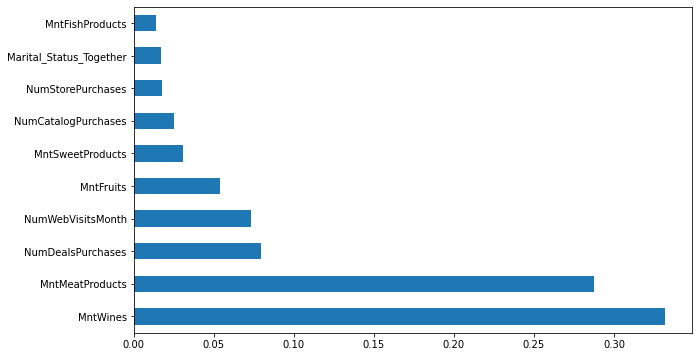

In [56]:
importance = pd.Series(model.feature_importances_,
              index=X_train.columns.values)
importance.nlargest(10).plot(kind='barh', figsize=(10, 6))

# Fine Tuning

In [48]:
from sklearn.model_selection import ParameterGrid

param_grid = {"n_estimators": range(1,500, 50)}
grid = ParameterGrid(param_grid)

In [49]:
mae = []

for params in grid:

  model = RandomForestRegressor(params['n_estimators'],
                                random_state=1502)
  
  model.fit(X_train, y_train)

  preds = model.predict(X_test)

  mae.append(mean_absolute_error(y_test, preds))

In [50]:
best_params = grid[np.argmin(mae)]
best_params

{'n_estimators': 51}